# Create noun list from body of text

Maps out the steps to create a lit of nouns for the french toast game using
arbitrary input text. For exmaple, [Moby Dick](https://www.gutenberg.org/files/2701/2701-0.txt) from the Gutenberg library. Along the way, gets some stats that could be interesting for tweaking the game's difficulty.
    
Example input:
>   Call me Ishmael. Some years ago—never mind how long precisely—having
    little or no money in my purse, and nothing particular to interest me
    on shore, I thought I would sail about a little and see the watery part
    of the world. It is a way I have of driving off the spleen and
    regulating the circulation.

Corresponding output:
>   money<br>
    purse<br>
    interest<br>
    shore<br>
    part<br>
    world<br>
    way<br>
    spleen<br>
    circulation<br>


## Imports

In [169]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Process input text

1.   Read input text file
1.   Split into list of sentences
1.   Remove non-words (e.g. `?`, `-`)
1.   Lowercase all (e.g. `call me ishmael`)
1.   Tokenize each sentence (e.g. `[call, me, ishmael]`)
1.   Get parts-of-speech for each token (e.g. `(ishmael, NNP)`)
1.   Combile list of nouns (NN) and proper nouns (NNP)
1.   Remove certain nouns (e.g. `i`, `something`, `anything`)

In [186]:
# Read text file, and store contents as string
with open('alice_in_wonderland.txt', 'r') as file:
    contents = file.read().replace('\n', ' ')

In [187]:
# Clean the text
regex = re.compile('[^a-zA-Z\' ]')
contents = regex.sub(' ', contents).lower()

In [188]:
# Split contents into array of sentences
sentences = re.split('[\?\.\!]', contents)

In [189]:
# Tokenize
tokenized_sentences = []

for sentence in sentences:
    tokens = nltk.word_tokenize(sentence)
    tokenized_sentences.append(tokens)

In [199]:
# Tag
tagged_sentences = []

for tokenized_sentence in tokenized_sentences:
    tagged_sentence = nltk.pos_tag(tokenized_sentence)
    tagged_sentences.append(tagged_sentence)

In [200]:
# Create stopword list
skipwords = []
with open('skipwords.txt', 'r') as f:
    for word in f.readlines():
        skipwords.append(word.strip())

print(skipwords)

['nothing', 'something', 'anything', 'thing', 'she', 'they', 'chapter', 'till', 'shouldn', 'wouldn', 'couldn', 'wasn', 'hadn', 'hasn', 'didn', 'doesn', 'beauti', 'oop', 'soo', 'dinah', 'chatte', 'hjckrrh', 'afford', 'dinn', 'shan', 'worse', 'snappishly', 'way', 'somebody', 'sort', 'one', 'distance', 'idea', 'name', 'sleepy', 'bit', 'wondering', 'wander', 'right', 'size', 'while', 'come', 'don', 'care', 'queer', 'everything', 'herself', 'himself', 'themselves', 'mine', 'his', 'hers', 'its', 'shrill', 'fancy', 'fond', 'trembling', 'tell', 'sulky', 'sit', 'hastily', 'wet', 'adjourn', 'meaning', 'solemn', 'please', 'quicker', 'stay', 'snappishly', 'aloud', 'nobody', 'down', 'swim', 'think', 'drunk', 'middle', 'fetch', 'hold', 'yer', 'nay', 'catch', 'tiptoe', 'languid', 'opening', 'see', 'contemptuously', 'languid', 'promising', 'repeat', 'none', 'taller', 'your', 'yours', 'wider', 'therefore', 'quite', 'giddy', 'better', 'wake', 'asleep', 'living', 'understand', 'get', 'someone', 'tis', 't

In [201]:
# Get nouns (NN) and propoer nouns (NNP)
# Requirements
# - Is NN or NNP
# - Is > 3 characters (to remove noise like i, t, s, it, etc.)
# - Is not in the skipwords list

nouns = []

for tagged_sentence in tagged_sentences:
    for item in tagged_sentence:
        if (item[1] == 'NN' or item[1] == 'NNP') and (len(item[0]) > 2) and (item[0] not in skipwords):
            nouns.append(item[0])

print(str(len(nouns)) + ' nouns after filtering')

3586 nouns after filtering


In [205]:
# Deduplicate list
nouns_deduped = []
nouns_deduped = list(dict.fromkeys(nouns))

print(str(len(nouns_deduped)) + '  nouns after duduping')

838  nouns after duduping


## Write output file

1.   Write all nouns to a `.txt` file, one word per line

In [206]:
with open('alice_in_worderland_wordlist.txt', 'w') as f:
    for noun in nouns_deduped:
        f.write(noun + '\n')

## Get word frequency statistics

1.  Show each noun's count and relative frequency as a table
1.  Show each noun's count as a barchart

In [126]:
# Get stats
d = {'noun' : [], 'count' : [], 'pct': []}
df = pd.DataFrame(data=d)

df['noun'] = np.array([noun for noun in nouns])
df['count'] = np.array([nouns.count(noun) for noun in nouns])
df['pct'] = np.array([nouns.count(noun) / len(nouns) * 100 for noun in nouns])

df = df.drop_duplicates(keep='first')
df = df.sort_values(by=['count'], ascending=False)

df.head(20)

,noun,count,pct
1,alice,256,6.481013
20,time,71,1.797468
2546,turtle,56,1.417722
2545,mock,56,1.417722
1742,hatter,56,1.417722
2247,king,56,1.417722
17,way,56,1.417722
2728,gryphon,55,1.392405
1472,queen,54,1.367089
0,rabbit,51,1.291139


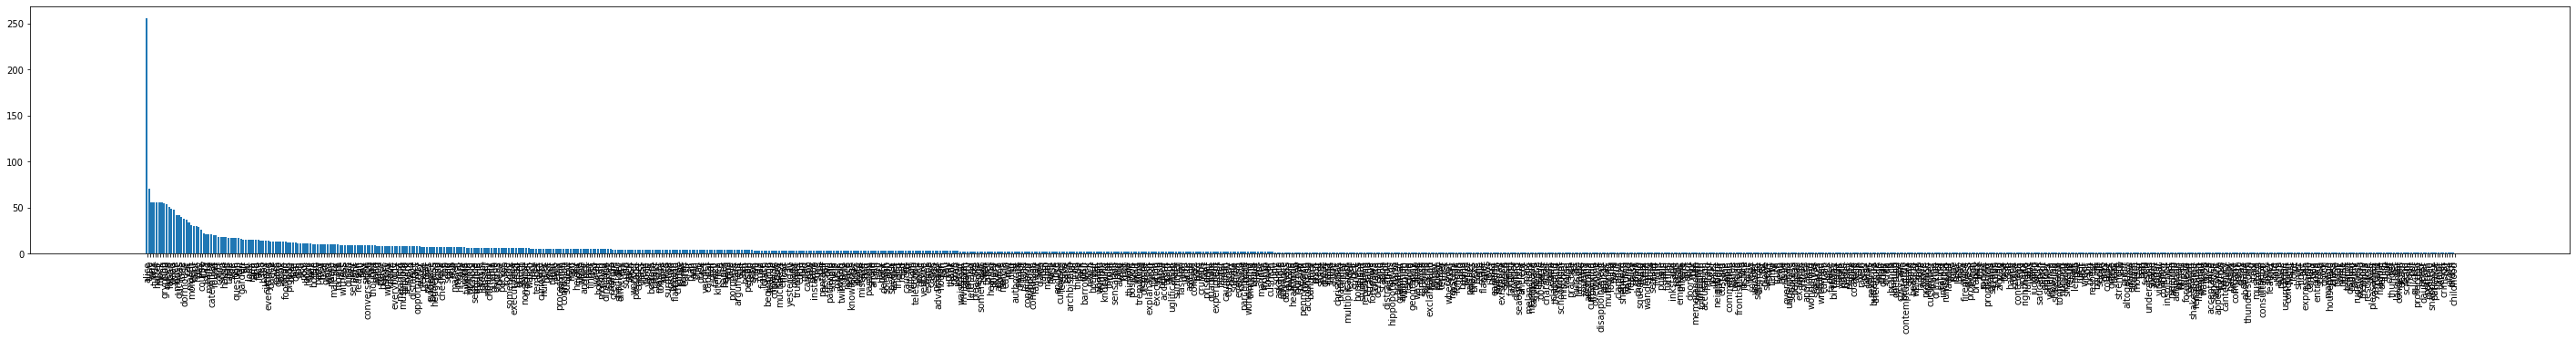

In [127]:
# Noun frequency chart
counts = Counter(nouns)
labels, values = zip(*counts.items())

indSort = np.argsort(values)[::-1]

labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = .5

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.bar(indexes, values)

plt.xticks(indexes + bar_width, labels, rotation=90)
plt.show()